In [15]:
%reset
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

sns.set()

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [ ]:
# sort out working directories
os.getcwd()
# path = 'input'
# os.chdir(path)
# os.getcwd()
project_dir = '/Users/karturi/Documents/KRA_MacBookPro/computing/Python/PoC_manuscript_figs'
#os.chdir(project_dir)
os.getcwd()

In [19]:
# read data preprocessed in knime
# df = pd.read_csv('../data/daint-data/daint_res_20210820.csv', encoding='latin-1', on_bad_lines='skip', lineterminator='\n')
# df = pd.read_csv('../data/daint-data/daint_res_20210830.csv', encoding='latin-1', on_bad_lines='skip', lineterminator='\n')
#df = pd.read_csv('../data/daint-data/data_20220901_NAcorr.csv', encoding='latin-1', on_bad_lines='skip',lineterminator='\n')
df = pd.read_csv('../data/daint-data/data_20220901_NAcorr.csv', encoding ='utf8' , engine='python')
print(df.shape)

(540771, 14)


In [20]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
sensitivity,0,0.0
specificity,0,0.0
precision,0,0.0
F,0,0.0
class,0,0.0
fps,0,0.0
model,0,0.0
sample,0,0.0
resample,0,0.0
cyto,0,0.0


In [21]:
# basic info about the df
print(df.columns)
print(df.size)
print(df.info)
print(df.shape)
print(df.head)
print(df.columns)
print(df.info)
print(df.dtypes)
print(df.columns)

Index(['sensitivity', 'specificity', 'precision', 'F', 'class', 'fps', 'model',
       'sample', 'resample', 'cyto', 'source', 'sampling_independent',
       'accuracy', 'cohen'],
      dtype='object')
7570794
<bound method DataFrame.info of         sensitivity  specificity  precision         F     class       fps  \
0          1.000000     0.000000   0.024096  0.047059  class143  Atompair   
1          1.000000     0.000000   0.024096  0.047059  class143  Atompair   
2          1.000000     0.000000   0.024096  0.047059  class143  Atompair   
3          1.000000     0.000000   0.024096  0.047059  class143  Atompair   
4          1.000000     0.000000   0.024096  0.047059  class143  Atompair   
...             ...          ...        ...       ...       ...       ...   
540766     0.000000     1.000000   0.500000  0.921029  class966       CSI   
540767     0.901099     1.000000   1.000000  0.947977  class969       CSI   
540768     0.213333     0.786667   0.500000  0.299065  class970  

In [22]:
# rename sampel and resample 
df.rename(columns = {'sample':'subsampling', 'resample':'resampling'}, inplace = True)
print(df['subsampling'].unique())
print(df['resampling'].unique())
print(df['fps'].unique())

['none' 'down' 'rose' 'smote' 'up']
['LGOCV' 'boot' 'repeatedcv']
['Atompair' 'Avalon' 'FCFP6' 'ECFP0' 'ECFP2' 'ECFP4' 'ECFP6' 'FCFP0'
 'FCFP2' 'FCFP4' 'EState' 'Extended' 'FeatMorgan' 'Layered' 'MACCS'
 'Morgan' 'Pattern' 'Pubchem' 'RDkit' 'Standard' 'Torsion' 'ToxPrint'
 'CSI' 'RDKit']


In [ ]:
# ALREADY DONE IN KNIME
# impute missing values based on mean from the same group: class, model, sample, resample. 
#df['accuracy'] = df.groupby(['class'], sort=False)['accuracy'].apply(lambda x: x.fillna(x.mean()))
#df['sensitivity'] = df.groupby(['class'], sort=False)['sensitivity'].apply(lambda x: x.fillna(x.mean()))
#df['cohen'] = df.groupby(['class'], sort=False)['cohen'].apply(lambda x: x.fillna(x.mean()))
#df['F'] = df.groupby(['class'], sort=False)['F'].apply(lambda x: x.fillna(x.mean()))
#df['specificity'] = df.groupby(['class'], sort=False)['specificity'].apply(lambda x: x.fillna(x.mean()))
#df['precision'] = df.groupby(['class'], sort=False)['precision'].apply(lambda x: x.fillna(x.mean()))
#df.dropna(inplace= True)

In [23]:
# subsets of df for processing visualization
df_cytotox = df[df['cyto'] == 'yes']
df_nocytotox = df[df['cyto'] == "no"]
df_daint = df[df['source'] == "daint"]
df_knime_oob= df[df['source'] == "knime-oob"]
df_knime_fb= df[df['source'] == "knime-fb"]
df_int = df[df['sampling_independent'] == "yes"]
df_ext = df[df['sampling_independent'] == "no"]
frames = [df_daint, df_knime_oob]
df_con = pd.concat(frames)

In [ ]:
# get unique categories
df_daint.describe()
print(df['model'].unique())
print(df['class'].unique())
print(df['subsampling'].unique())
print(df['resampling'].unique())
print(len(df_daint['model'].unique()))
print(df_daint['resampling'].unique())

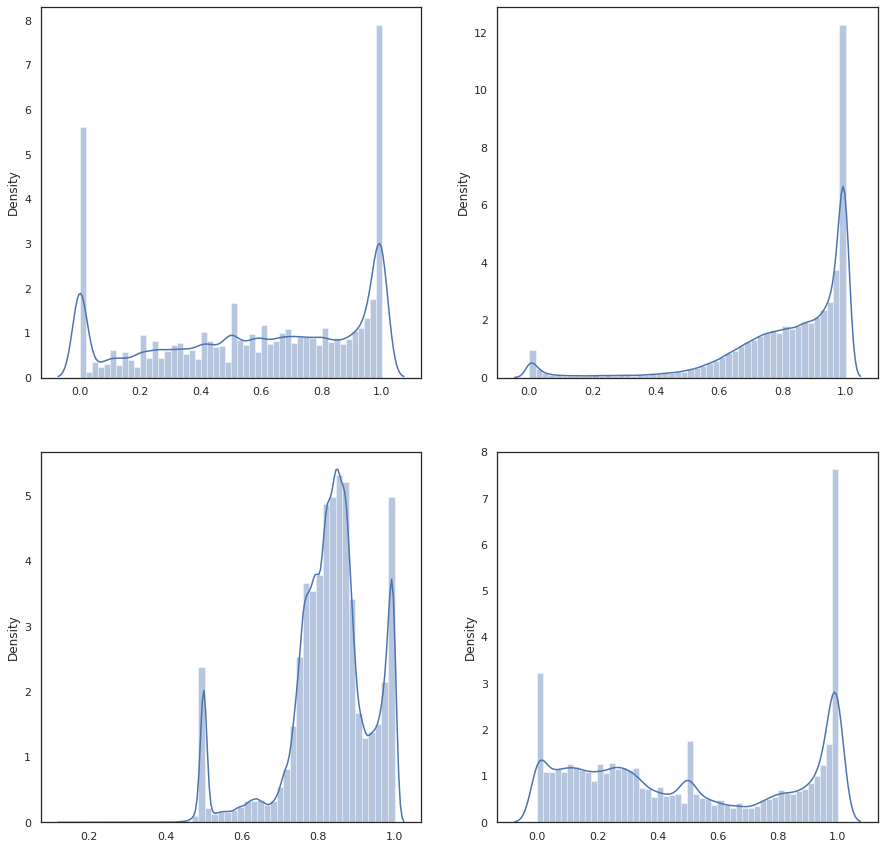

In [25]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.color_palette("rocket", as_cmap=True)
sns.set_style('white')
fig, axes = plt.subplots(2, 2)
sns.distplot(ax=axes[0,0], x=df['sensitivity'], color=None);
sns.distplot(ax=axes[0,1], x=df['specificity'], color=None);
sns.distplot(ax=axes[1,0], x=df['accuracy'], color=None);
sns.distplot(ax=axes[1,1], x=df['precision'], color=None);

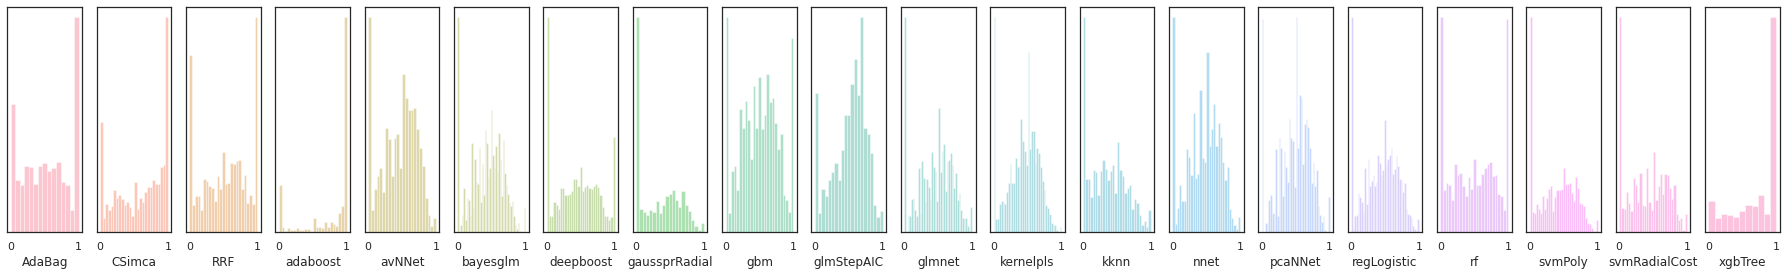

In [26]:
# daint
categories = np.unique(df_daint.model.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df_daint.groupby("model"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

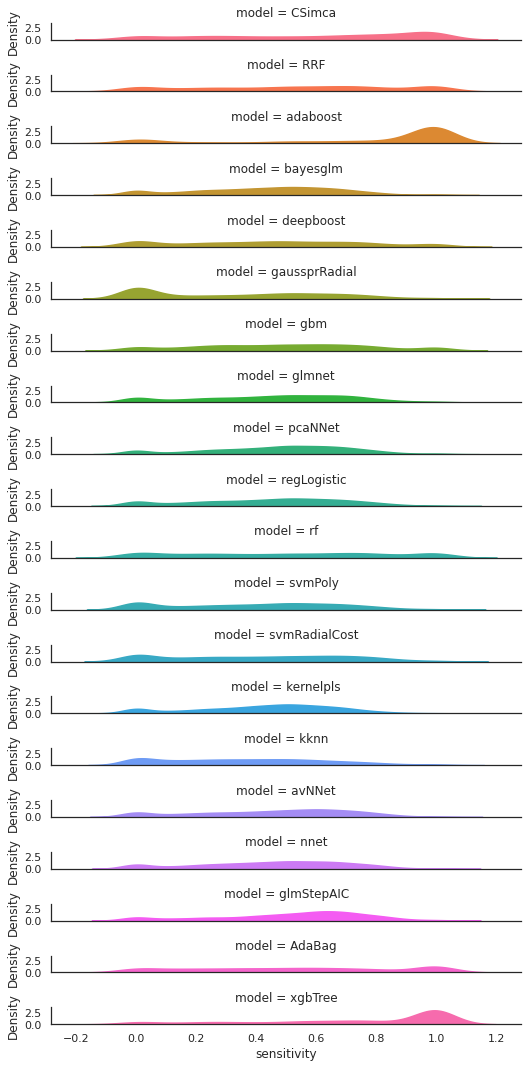

In [27]:
g = sns.FacetGrid(df_daint, #the dataframe to pull from
                  row="model", #define the column for each subplot row to be differentiated by
                  hue="model", #define the column for each subplot color to be differentiated by
                  aspect=10, #aspect * height = width
                  height=0.75, #height of each subplot
                  palette='husl' #google colors
                 )
g.map(sns.kdeplot, "sensitivity", shade=True, alpha=1, lw=1.5, bw=0.2)

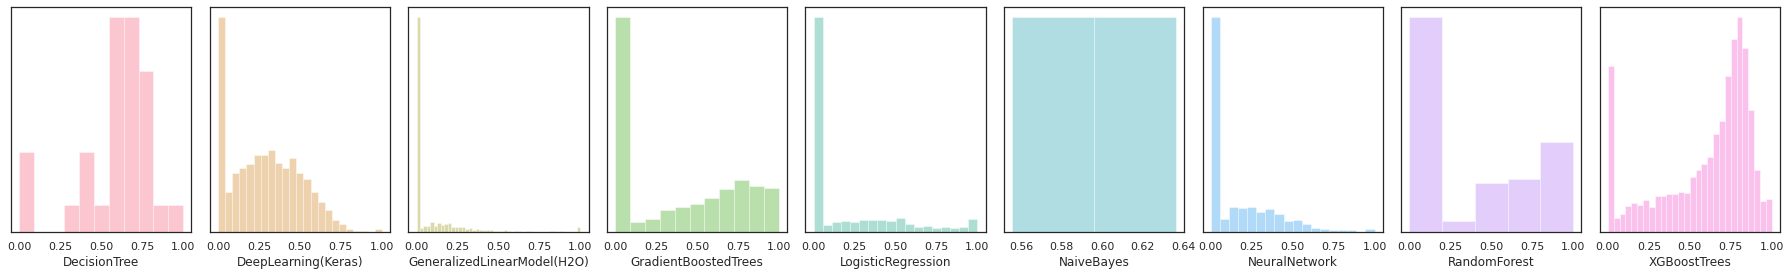

glmnet                            31703
CSimca                            29419
regLogistic                       29185
svmRadialCost                     28051
svmPoly                           27898
bayesglm                          26754
deepboost                         25999
rf                                22588
Random Forest                     22151
Logistic Regression               22151
Gradient Boosted Trees            22151
XGBoost Trees                     22151
Decision Tree                     22145
Generalized Linear Model (H2O)    21395
Naive Bayes                       21289
RRF                               18808
pcaNNet                           17013
gaussprRadial                     15003
Neural Network                    14880
kernelpls                         14326
kknn                              12814
Deep Learning (Keras)             10636
nnet                               9064
gbm                                8285
XGBoostTrees                       7951


In [28]:
# knime oob
categories = np.unique(df_knime_oob.model.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df_knime_oob.groupby("model"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()
df['model'].value_counts()

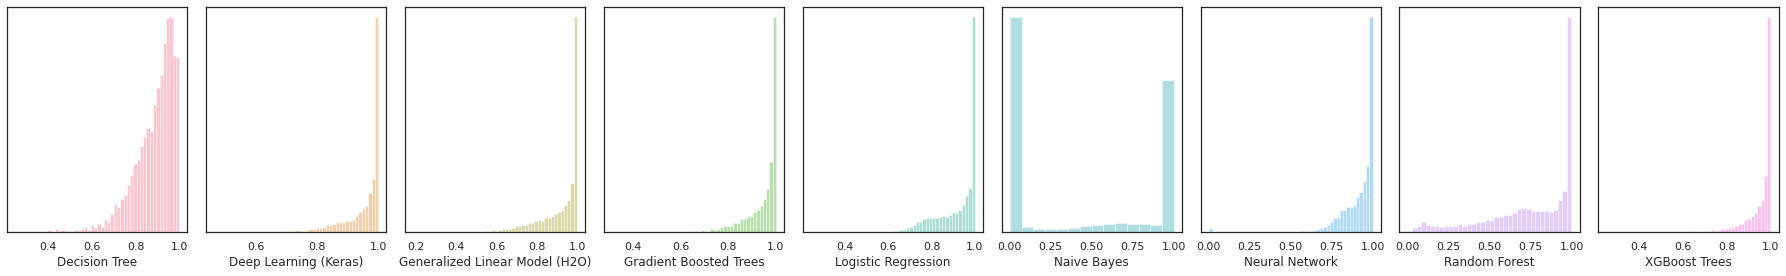

glmnet                            31703
CSimca                            29419
regLogistic                       29185
svmRadialCost                     28051
svmPoly                           27898
bayesglm                          26754
deepboost                         25999
rf                                22588
Random Forest                     22151
Logistic Regression               22151
Gradient Boosted Trees            22151
XGBoost Trees                     22151
Decision Tree                     22145
Generalized Linear Model (H2O)    21395
Naive Bayes                       21289
RRF                               18808
pcaNNet                           17013
gaussprRadial                     15003
Neural Network                    14880
kernelpls                         14326
kknn                              12814
Deep Learning (Keras)             10636
nnet                               9064
gbm                                8285
XGBoostTrees                       7951


In [29]:
# knime fb
categories = np.unique(df_knime_fb.model.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df_knime_fb.groupby("model"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()
df['model'].value_counts()

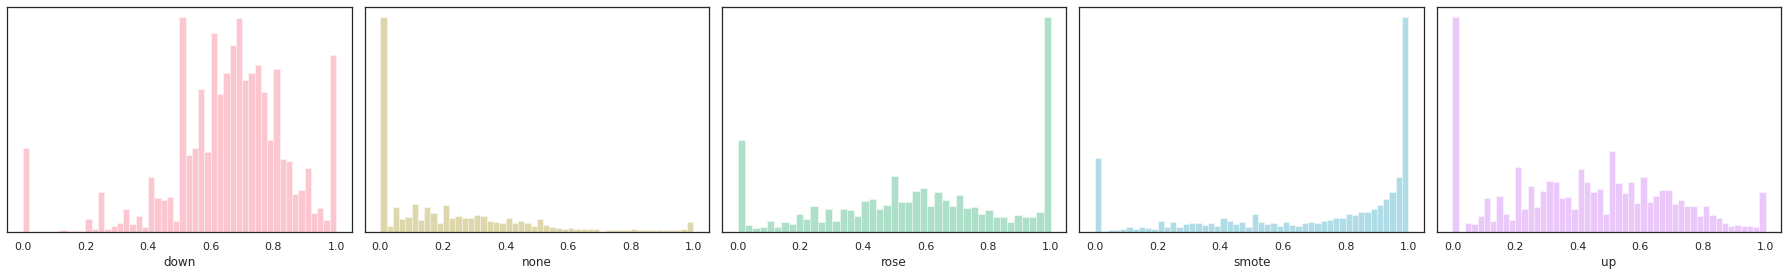

smote    269108
down      70892
none      69330
rose      67910
up        63531
Name: subsampling, dtype: int64

In [30]:
# sampling type - SMOTE is the best
categories = np.unique(df.subsampling.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df.groupby("subsampling"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()
df['subsampling'].value_counts()

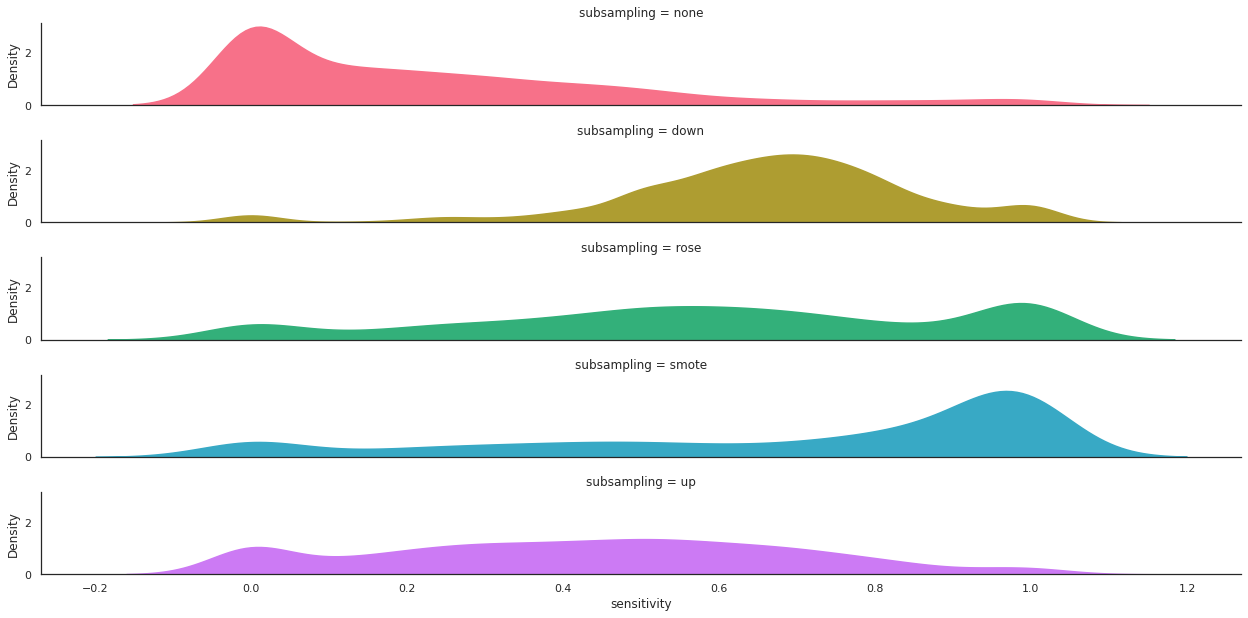

In [31]:
g = sns.FacetGrid(df, #the dataframe to pull from
                  row="subsampling", #define the column for each subplot row to be differentiated by
                  hue="subsampling", #define the column for each subplot color to be differentiated by
                  aspect=10, #aspect * height = width
                  height=1.75, #height of each subplot
                  palette='husl' #google colors
                 )
g.map(sns.kdeplot, "sensitivity", shade=True, alpha=1, lw=1.5, bw=0.2)

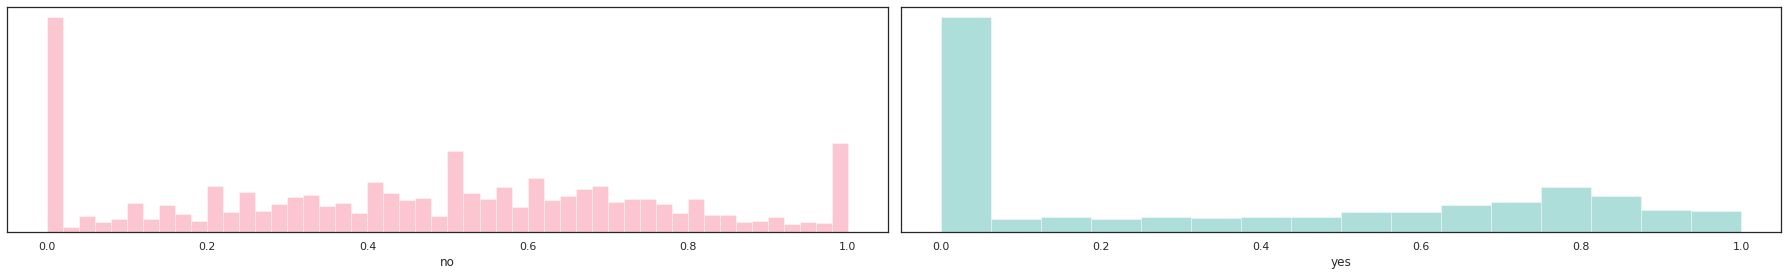

no     446081
yes     94690
Name: cyto, dtype: int64

In [32]:
# cytotox - similar distributions, the result is more complex and depends on the data, i.e, adaptive cytotoxicity filtration necessary. 
# the knime_fb results are removed as they are overly optimistic. should not be analayzed from now on. 
categories = np.unique(df_con.cyto.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df_con.groupby("cyto"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()
df['cyto'].value_counts()

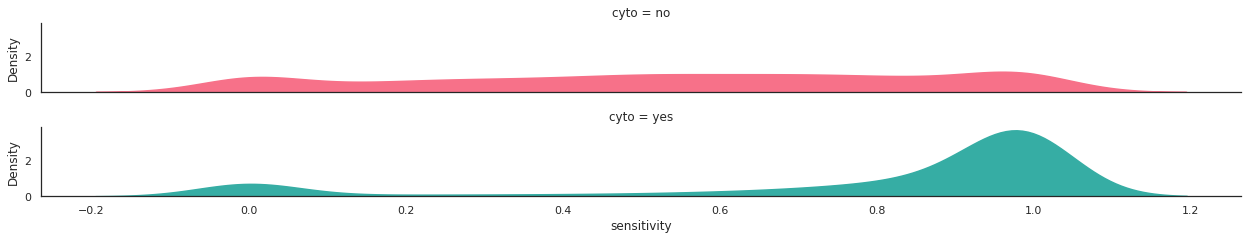

In [33]:
g = sns.FacetGrid(df, #the dataframe to pull from
                  row="cyto", #define the column for each subplot row to be differentiated by
                  hue="cyto", #define the column for each subplot color to be differentiated by
                  aspect=10, #aspect * height = width
                  height=1.75, #height of each subplot
                  palette='husl' #google colors
                 )
g.map(sns.kdeplot, "sensitivity", shade=True, alpha=1, lw=1.5, bw=0.2)

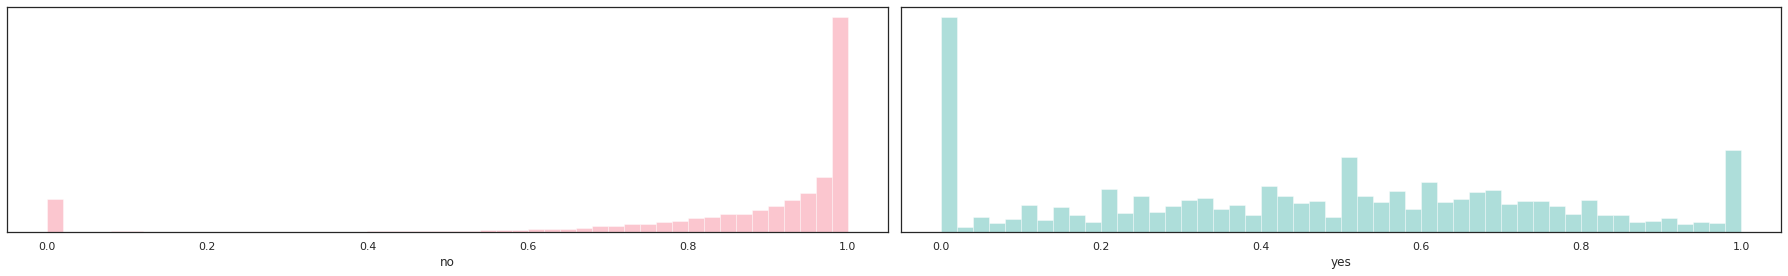

yes    361822
no     178949
Name: sampling_independent, dtype: int64

In [34]:
# sampling_independent
# the knime_fb results are removed as they are overly optimistic. should not be analayzed from now on. new dataframe df_con
categories = np.unique(df.sampling_independent.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df.groupby("sampling_independent"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()
df['sampling_independent'].value_counts()

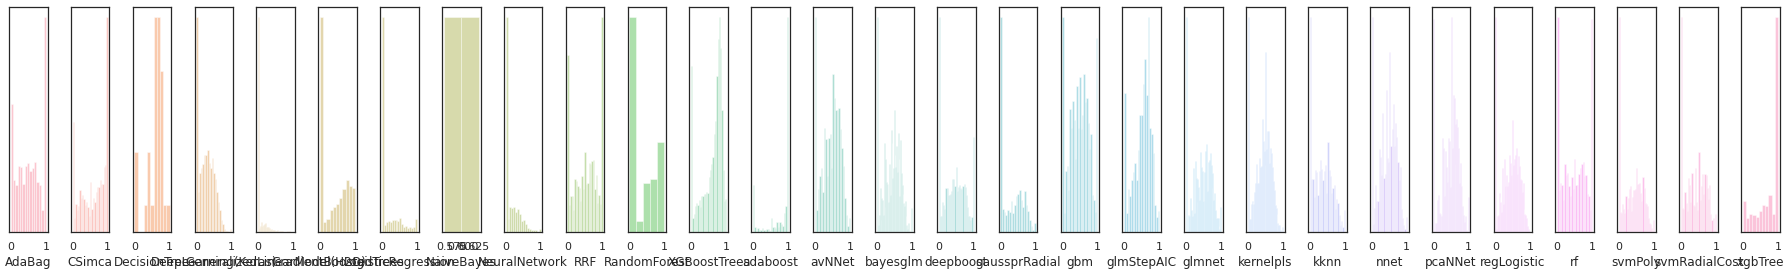

In [35]:
# model on df_con
categories = np.unique(df_con.model.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df_con.groupby("model"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

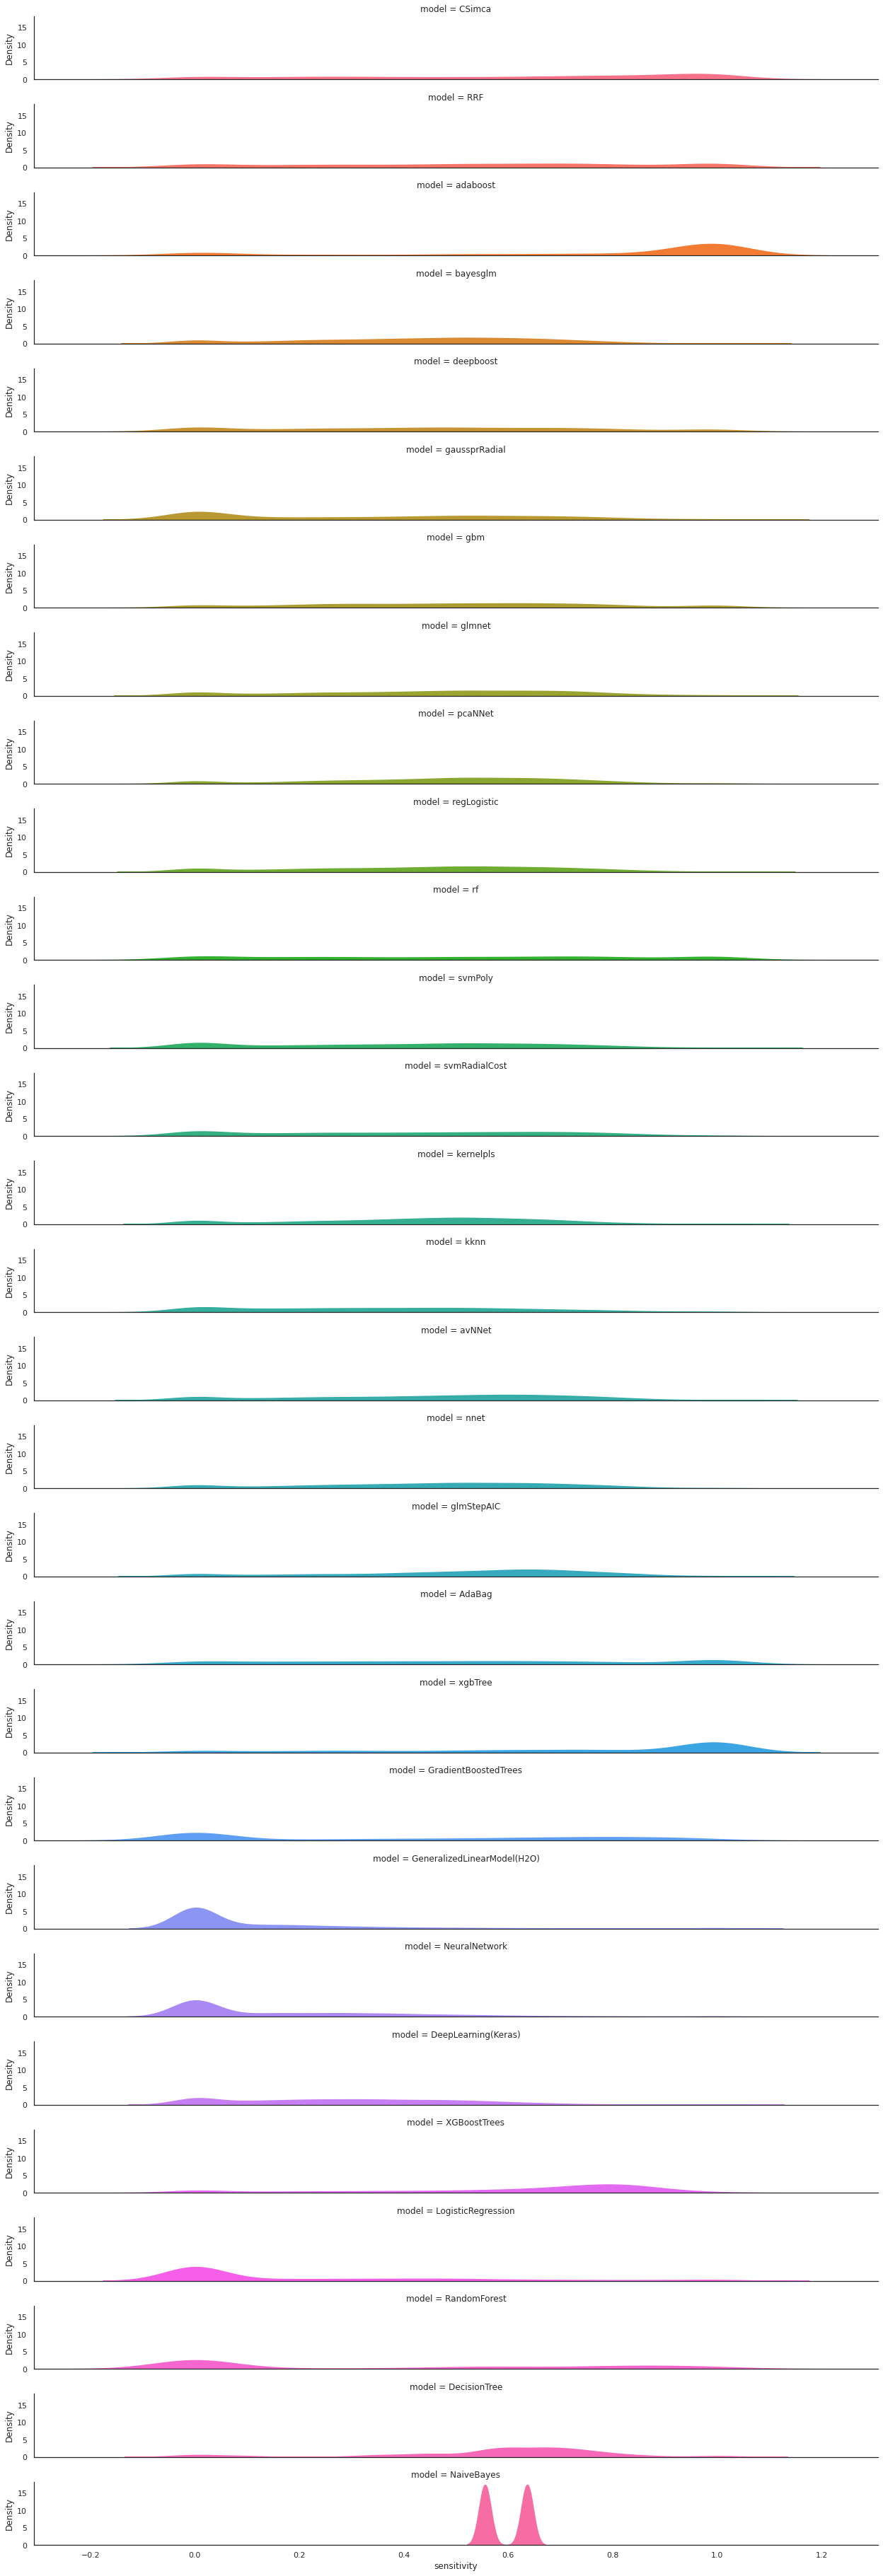

In [36]:
g = sns.FacetGrid(df_con, #the dataframe to pull from
                  row="model", #define the column for each subplot row to be differentiated by
                  hue="model", #define the column for each subplot color to be differentiated by
                  aspect=10, #aspect * height = width
                  height=1.75, #height of each subplot
                  palette='husl' #google colors
                 )
g.map(sns.kdeplot, "sensitivity", shade=True, alpha=1, lw=1.5, bw=0.2)

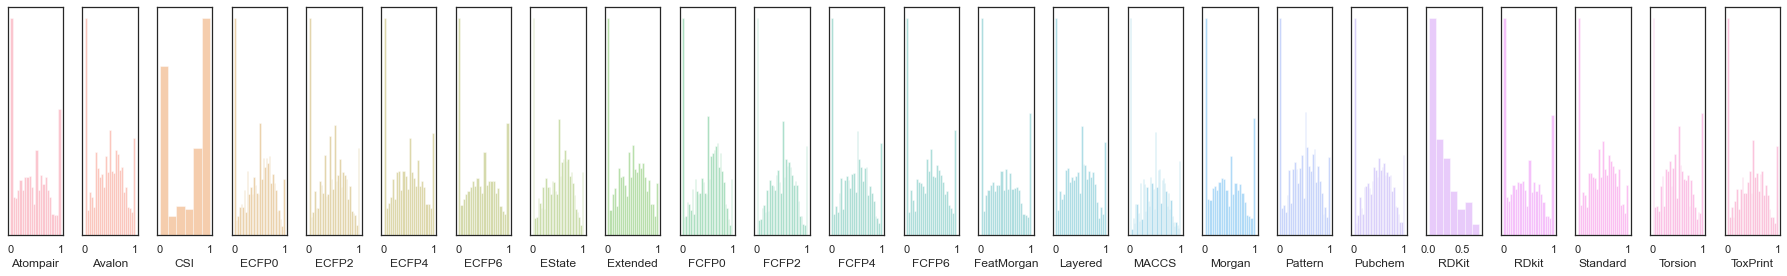

MACCS         39581
FCFP0         22288
EState        21775
ECFP0         21728
FCFP2         19992
ECFP2         17331
ToxPrint      16475
FCFP4         16237
Pubchem       15989
Torsion       15400
FCFP6         13805
ECFP4         13723
Pattern       13260
Layered       12961
FeatMorgan    12894
ECFP6         12757
RDkit         12692
Standard      12552
Morgan        12513
Extended      12411
Atompair      12247
Avalon        11886
CSI             953
RDKit           137
Name: fps, dtype: int64

In [44]:
# fps on df_con - CSI work really good still!
categories = np.unique(df_con.fps.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df_con.groupby("fps"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()
df_con.fps.unique()
df_con['fps'].value_counts()

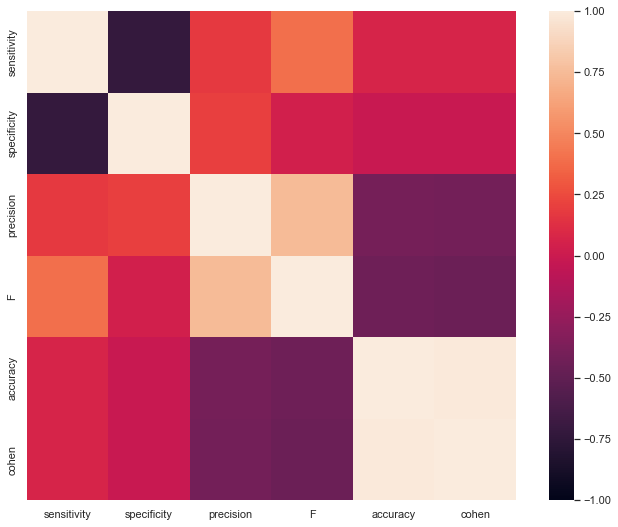

In [45]:
#correlation matrix
corrmat = df_con.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True);

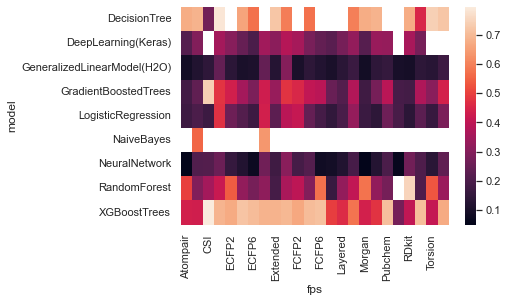

In [67]:
# for the heatmap we present just a subset from knime results. CSI fps were not tested on daint. 
df_con_knime = df_con[df_con['source']=="knime-oob"]
df_con_knime.shape
df_con_sel = df_con_knime[["sensitivity", "model", "fps"]]
df_con_sel_avg = df_con_sel.groupby(["model", "fps"], as_index=False).mean('sensitivity')
df_con_sel_avg_piv = df_con_sel_avg.pivot("model", "fps", "sensitivity")
ax = sns.heatmap(df_con_sel_avg_piv)

In [96]:
# filter for sucessful models based on sensitivity and precision df_con_filt
df_con_filt = df_con[(df_con["sensitivity"] > 0.95) & (df_con["precision"] > 0.95)]
print(df_con.shape)
print(df_con_filt.shape)
df_con_filt_class = df_con_filt.groupby(['class']).mean()
print(df_con_filt_class.shape)
df_con_filt.value_counts('fps')

(361587, 14)
(412, 14)
(159, 6)


fps
CSI           116
ECFP0          30
MACCS          30
EState         28
FCFP0          26
Pubchem        22
FCFP2          21
FCFP4          19
ECFP2          19
ToxPrint       15
ECFP4          12
Standard       11
Extended        8
FCFP6           8
ECFP6           8
FeatMorgan      7
Pattern         7
Avalon          5
Layered         4
Morgan          4
RDkit           4
Torsion         4
Atompair        4
dtype: int64

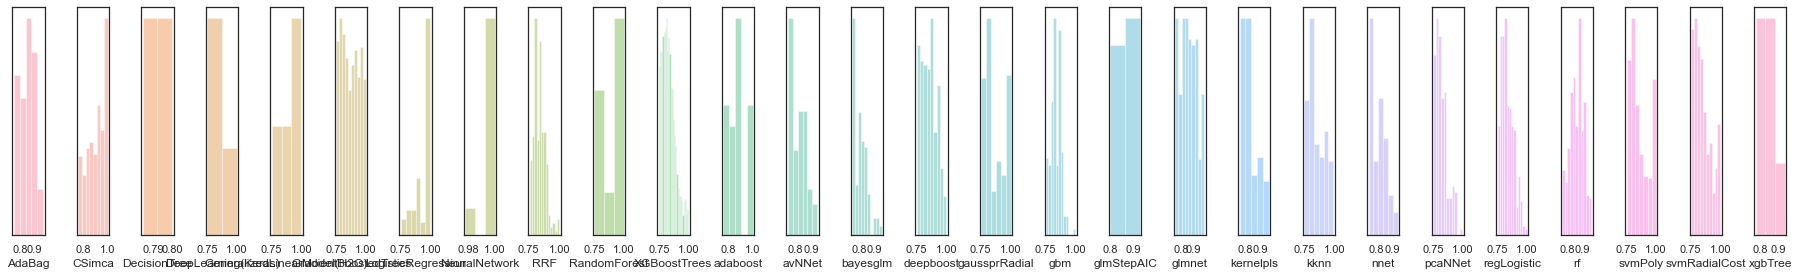

In [74]:
# model on df_con_filt
categories = np.unique(df_con_filt.model.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df_con_filt.groupby("model"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

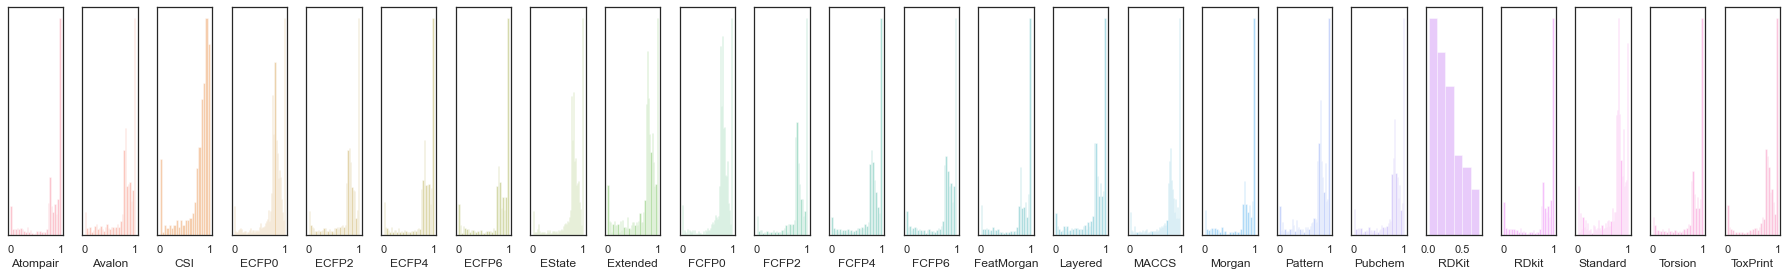

In [70]:
# fps on df_con_filt
categories = np.unique(df_con_filt.fps.values)
palette = iter(sns.husl_palette(len(categories)))
sns.set_style('white')
fig, axes = plt.subplots(ncols=len(categories), figsize=(25, 4))
for (n, rat), ax in zip(df_con_filt.groupby("fps"), axes):

    sns.distplot(rat["sensitivity"], kde=False, color=next(palette), ax=ax, axlabel=f"{n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()